**Analysis on Housing in Boston**

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pk
import scipy.stats as stat

In [53]:
vic = [1,2,3,4,5,6,7,8,9,10]
vic_array = np.array(vic)


In [83]:
bost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [25]:
bost = pd.read_csv("Boston.csv")
bost.drop(labels ='Unnamed: 0',axis = 1,inplace = True)

In [26]:
bost.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 864x720 with 0 Axes>

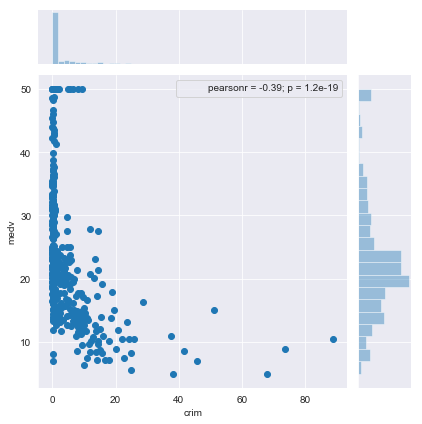

In [54]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.jointplot(x = 'crim',y = 'medv',data=bost,stat_func=stat.pearsonr)

1. The lower the crime rate the more value of homes

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


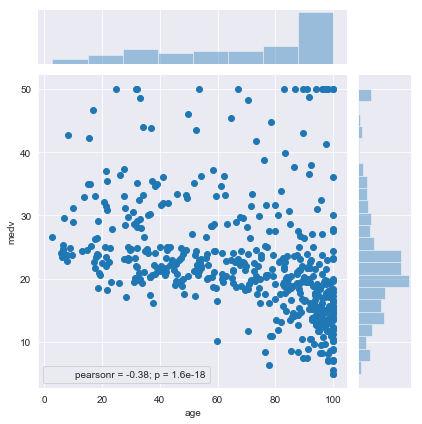

In [67]:
sns.jointplot(x = 'age',y = 'medv',data=bost,stat_func=stat.pearsonr)

In [57]:
bost.columns

Index(['crim', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


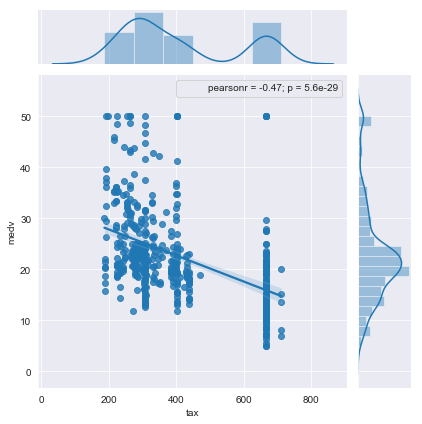

In [62]:
sns.jointplot(x = 'tax',y = 'medv',data=bost,stat_func=stat.pearsonr,kind='reg')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


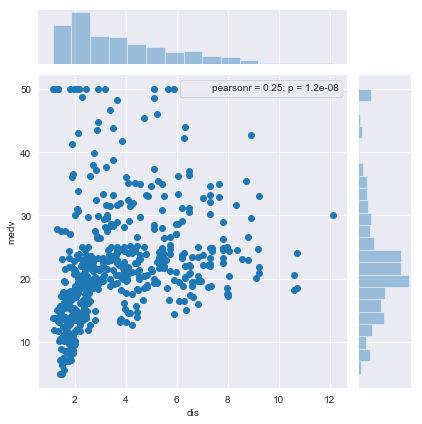

In [59]:
sns.jointplot(x = 'dis',y = 'medv',data=bost,stat_func=stat.pearsonr)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


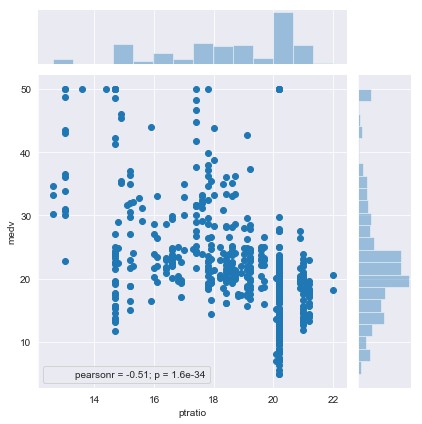

In [61]:
sns.jointplot(x = 'ptratio',y = 'medv',data=bost,stat_func=stat.pearsonr)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


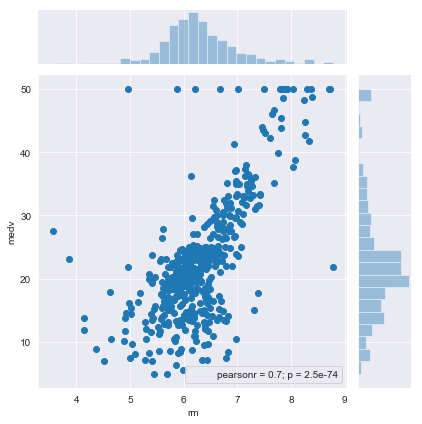

In [64]:
sns.jointplot(x = 'rm',y = 'medv',data=bost,stat_func=stat.pearsonr)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


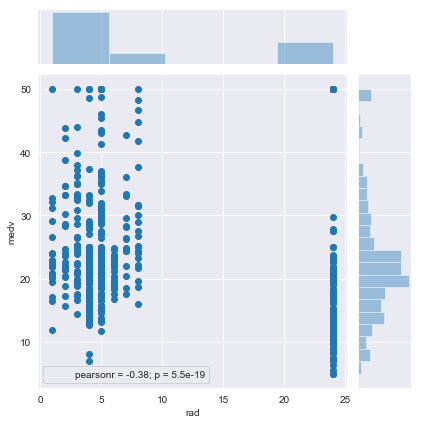

In [65]:
sns.jointplot(x = 'rad',y = 'medv',data=bost,stat_func=stat.pearsonr)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


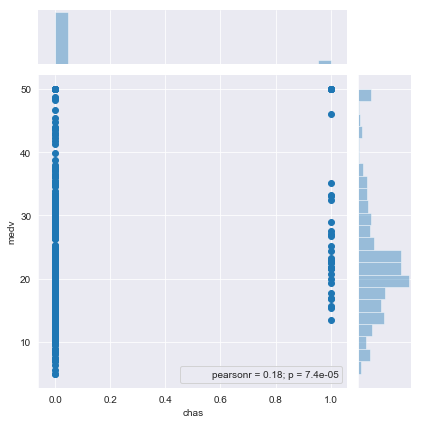

In [75]:
sns.jointplot(x = 'chas',y = 'medv',data=bost,stat_func=stat.pearsonr)

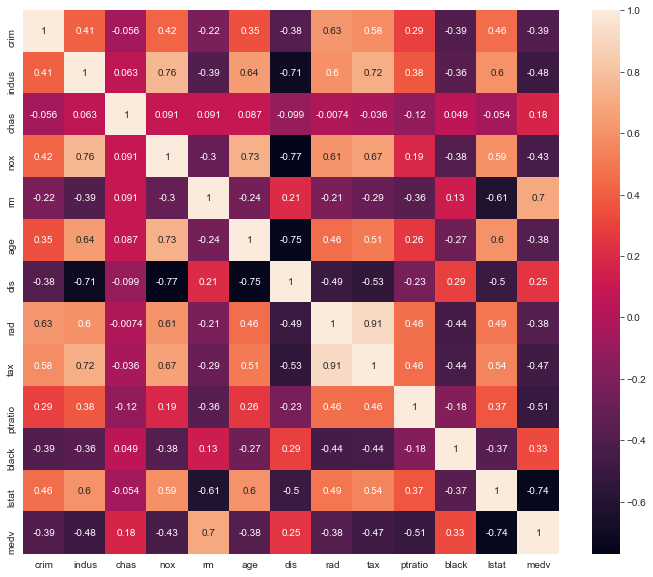

In [72]:
plt.figure(figsize =(12,10))
sns.heatmap(bost.corr(),annot=True)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [91]:
house = LinearRegression()

In [202]:
X = bost.drop(labels=["medv","age","indus","black"],axis = 1)
y = bost["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [203]:
house.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [204]:
pd.DataFrame(house.coef_,index = X.columns,columns=["coeficient"]) 

,coeficient
crim,-0.081020
chas,4.412001
nox,-18.081260
rm,3.015226
dis,-1.163155
rad,0.206084
tax,-0.007568
ptratio,-0.935960
lstat,-0.638939


In [205]:
prediction = house.predict(X_test)

In [206]:
prediction

array([37.27582562, 28.45517266, 17.63436904, 17.0842721 , 28.89818813,
       30.92740655, 38.08012977,  8.81350092, 33.21523806,  6.6309283 ,
       28.5106999 , 12.68221572, 17.83226917, 17.66830627, 25.17394451,
       19.99285671,  7.88876485, 30.38706955, 29.29481014, 25.35246315,
       11.30562139, 20.55995621, 22.56699905, 25.84348447, 31.10193154,
       18.09069212, 33.35059227, 18.02835715, 27.60319438, 32.23605117,
       20.65553731, 18.91759153, 34.09643774, 42.3774721 , 28.53402199,
       22.90794338, 17.19271024, 18.34210305,  4.76520826, 30.72731905,
       24.41629577, 16.46924603, 34.86919122, 12.81532064, 17.8826354 ,
       25.33074757, 30.80719912, 15.37206277, 26.48431524, 23.81184429,
       32.38327066, 37.23891627, 23.07102115, 19.53043793, 30.96354717,
       -1.47050038, 20.62244227, 16.46238599, 24.10376916, 21.28767363,
       28.35791449,  1.94662907, 16.17262273, 18.54935494, 11.62323042,
       24.39529702, 24.67489767, 19.91780293, 16.29260296, 20.00

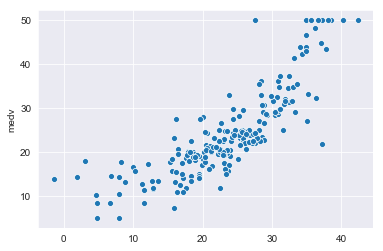

In [207]:
sns.scatterplot(x = prediction,y=y_test,estimator=np.median)

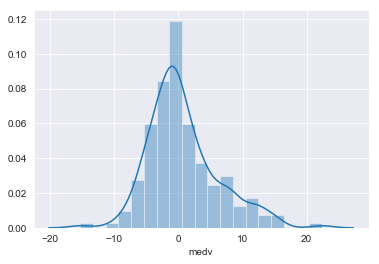

In [208]:
sns.distplot(y_test-prediction)

In [209]:
house.score(X_test,y_test)

0.6888226253258876

In [214]:
stat.pearsonr(bost["age"],bost["medv"])

(-0.3769545650045962, 1.569982209188298e-18)